In [23]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

from imutils.video import VideoStream
from imutils import face_utils
import argparse
import imutils
import time
import dlib

import sys
from paths import Paths
paths = Paths()
sys.path.append(paths.scripts_root)
import util

%load_ext autoreload
%autoreload 2

# Display entire width of browser
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

paths.print_paths()
print("dlib version:", dlib.__version__)
print("cv2 version:", cv2.__version__)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Paths defined in paths module:
 paths.data_root: /Users/trafferty/data
 paths.notebook_root: /Users/trafferty/data/notebooks
 paths.scripts_root: /Users/trafferty/data/scripts
 paths.images_root: /Users/trafferty/data/images
 paths.projects_root: /Users/trafferty/data/projects
 paths.results_root: /Users/trafferty/data/results
 paths.tmp_root: /Users/trafferty/data/tmp
 paths.dat_root: /Users/trafferty/data/dat
 paths.tmp_dir: /Users/trafferty/tmp
 paths.ws_dir: /Users/trafferty/workspace
 paths.mii_home: /Users/trafferty/dev
 paths.inhouse: /Users/trafferty/dev/src/inhouse
dlib version: 19.15.0
cv2 version: 3.4.1


In [10]:
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
shape_predictor = paths.dat_root+'/shape_predictor_68_face_landmarks.dat'
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(shape_predictor)

In [9]:
#image_path = paths.images_root+'/the_fam.jpg'
image_path = paths.tmp_dir + '/pyimageconf/images/dlib_example_faces/bald_guys.jpg'

In [34]:
# load the input image, resize it, and convert it to grayscale
image = cv2.imread(image_path)
image = imutils.resize(image, width=800)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
# detect faces in the grayscale image
rects = detector(gray, 1)
print(f"found {len(rects)} faces")

found 24 faces


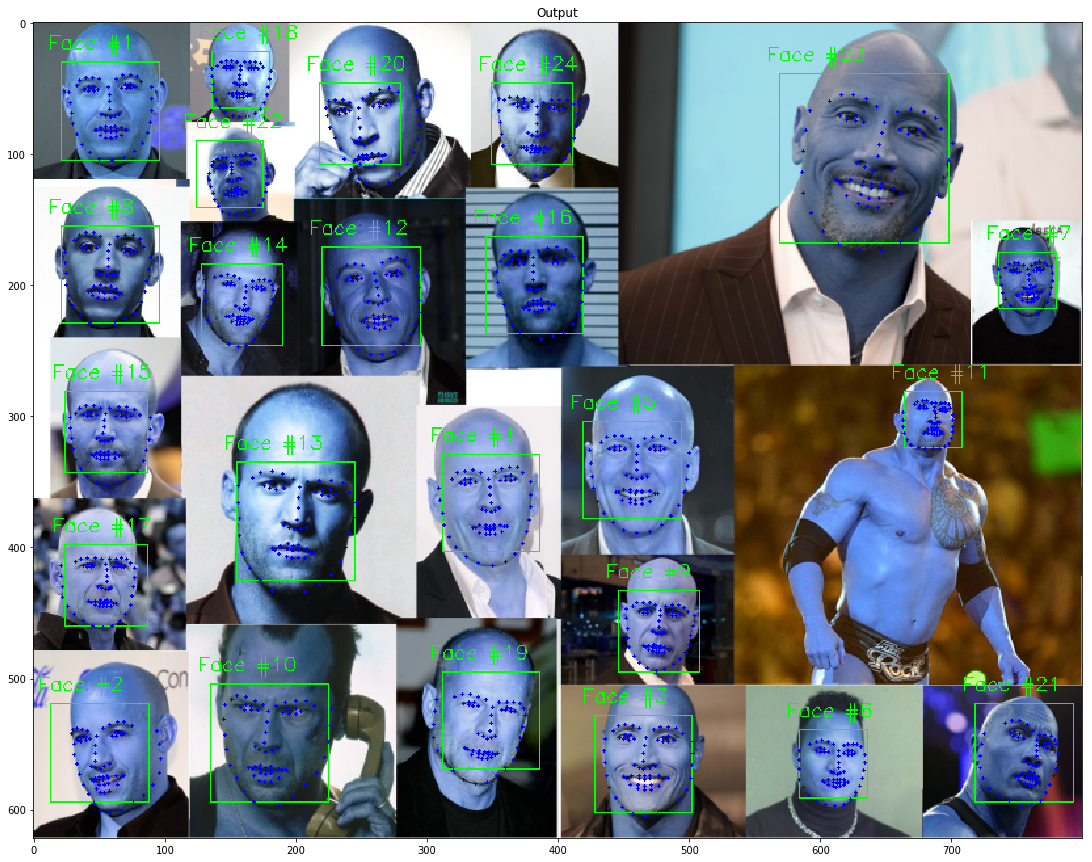

In [35]:
out_img = image.copy()

# loop over the face detections
for (i, rect) in enumerate(rects):
    # determine the facial landmarks for the face region, then
    # convert the facial landmark (x, y)-coordinates to a NumPy
    # array
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)

    # convert dlib's rectangle to a OpenCV-style bounding box
    # [i.e., (x, y, w, h)], then draw the face bounding box
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(out_img, (x, y), (x + w, y + h), (0, 255, 0), 1)
 
    # show the face number
    cv2.putText(out_img, "Face #{}".format(i + 1), (x - 10, y - 10),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
 
    # loop over the (x, y)-coordinates for the facial landmarks
    # and draw them on the image
    for (x, y) in shape:
        cv2.circle(out_img, (x, y), 1, (0, 0, 255), -1)
 
# show the output image with the face detections + facial landmarks

plt.figure(figsize = (40,15))
plt.imshow(out_img, interpolation='nearest', aspect='equal')
plt.title("Output")
plt.show()


In [36]:
try:
    import cPickle as pickle
except ImportError:
    import pickle

x = dlib.vectors()
y = dlib.array()

# Make a training dataset.  Here we have just two training examples.  Normally
# you would use a much larger training dataset, but for the purpose of example
# this is plenty.  For binary classification, the y labels should all be either +1 or -1.
x.append(dlib.vector([1, 2, 3, -1, -2, -3]))
y.append(+1)

x.append(dlib.vector([-1, -2, -3, 1, 2, 3]))
y.append(-1)


# Now make a training object.  This object is responsible for turning a
# training dataset into a prediction model.  This one here is a SVM trainer
# that uses a linear kernel.  If you wanted to use a RBF kernel or histogram
# intersection kernel you could change it to one of these lines:
#  svm = dlib.svm_c_trainer_histogram_intersection()
#  svm = dlib.svm_c_trainer_radial_basis()
svm = dlib.svm_c_trainer_linear()
svm.be_verbose()
svm.set_c(10)

# Now train the model.  The return value is the trained model capable of making predictions.
classifier = svm.train(x, y)

# Now run the model on our data and look at the results.
print("prediction for first sample:  {}".format(classifier(x[0])))
print("prediction for second sample: {}".format(classifier(x[1])))


# classifier models can also be pickled in the same was as any other python object.
with open('saved_model.pickle', 'wb') as handle:
    pickle.dump(classifier, handle, 2)

prediction for first sample:  1.0
prediction for second sample: -1.0


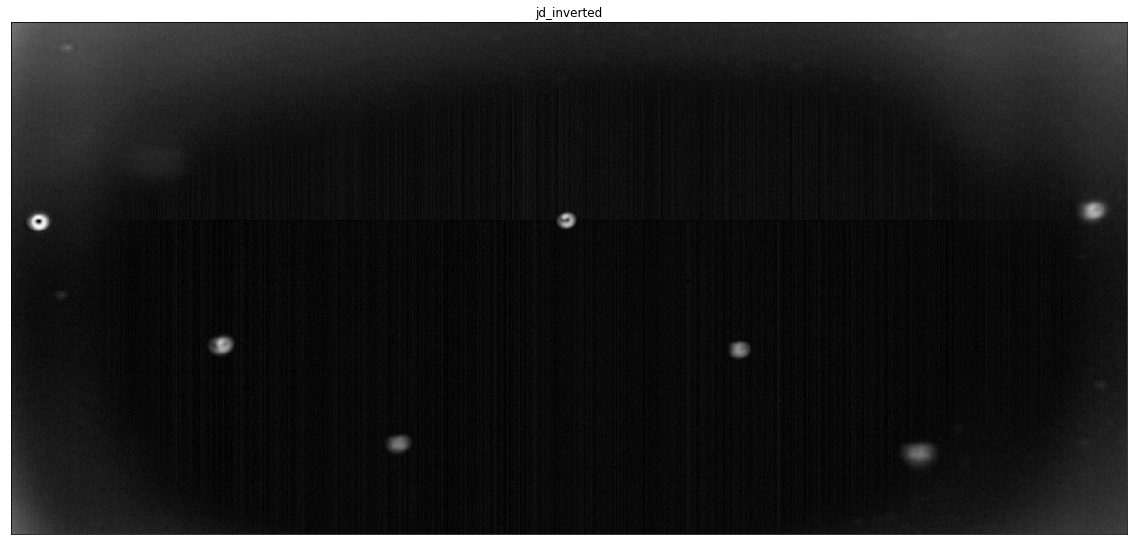

In [37]:
jd = cv2.imread('/Users/trafferty/tmp/DIF/just_drops.png', cv2.IMREAD_GRAYSCALE)
jd_inverted = 255-jd
cv2.imwrite('/Users/trafferty/tmp/DIF/just_drops_inverted.png',jd_inverted)
util.plot_imgs([( jd_inverted, "jd_inverted")], fig_size=20)